In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, jaccard_score, log_loss, classification_report
import itertools

In [2]:
df = pd.read_csv('customer_churn.csv', low_memory=False)
print(df.shape)
df.head(5)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
8     7892-POOKP  Female              0     Yes         No      28   
9     6388-TABGU    Male              0      No        Yes      62   
10    9763-GRSKD    Male              0     Yes        Yes      13   
11    7469-LKBCI    Male              0      No         No      16   
12    8091-TTVAX    Male              0     Yes         

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data Cleaning and Preparation

In [6]:
model_features = ['SeniorCitizen', 'Dependents','PhoneService','MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup','StreamingTV', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges']
X = pd.get_dummies(df[model_features], drop_first=False)
X = np.asanyarray(X.values).astype(float)

In [7]:
df['Churn'] = (df.Churn=='Yes').astype(int)

In [8]:
# model ouput
y = np.asanyarray(df.Churn.values)

In [9]:
# Normalizing and Standardizing the data
X = StandardScaler().fit_transform(X)
X[:3]

array([[-0.43991649, -1.16032292,  0.65401193, -0.65401193,  3.05401039,
        -3.05401039, -0.96332984,  3.05401039, -0.85417615,  1.38171215,
        -0.88565976, -0.52592737,  1.00669571, -0.52592737, -0.63393298,
        -0.88361972, -0.52592737,  1.3782406 ,  1.2273572 , -0.52592737,
        -0.79013171,  0.90418382, -0.51424938, -0.56297505, -0.8297975 ,
         0.8297975 , -0.5298852 , -0.52504733,  1.40641839, -0.54480692],
       [-0.43991649, -0.25962894,  0.65401193, -0.65401193, -0.32743831,
         0.32743831,  1.03806605, -0.32743831, -0.85417615,  1.38171215,
        -0.88565976, -0.52592737, -0.99334883, -0.52592737,  1.57745383,
         1.13170855, -0.52592737, -0.72556272,  1.2273572 , -0.52592737,
        -0.79013171, -1.1059698 ,  1.94458183, -0.56297505,  1.20511329,
        -1.20511329, -0.5298852 , -0.52504733, -0.71102597,  1.83551265],
       [-0.43991649, -0.36266036,  0.65401193, -0.65401193, -0.32743831,
         0.32743831,  1.03806605, -0.32743831, -0

#### Splitting the Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)
print('Length of the training data is:', (X_train.shape[0]))
print('Length of the testing data is:', (y_test.shape[0]))

Length of the training data is: 4930
Length of the testing data is: 2113


### Models Selection and Training

For this task, we are going to train four different ML models and conduct evaluation for the performance of every single one of them. After this, we will pick the model with the best performance as our model of choice.
The algorithms that we will use are;
</br>. KNN </br>
. DECISION TREES</br>
. LOGISTIC REGRESSION
. SUPPORT VECTOR MACHINES

#### KNN Classification

In [11]:
# TRAINING
k = 4
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier(n_neighbors=4)

In [13]:
# PREDICTING
y_pred = knn.predict(X_test)
y_pred[:5]  #predicted values

array([1, 0, 0, 0, 0])

In [14]:
y_test[:5] #actual values

array([1, 0, 0, 1, 0])

##### Evaluation

In [15]:
train_set_acc = accuracy_score(y_train, knn.predict(X_train)) 
test_set_acc = accuracy_score(y_test, y_pred)
print("Train set Accuracy: ", train_set_acc)
print("Test set Accuracy: ", test_set_acc)

Train set Accuracy:  0.8245436105476673
Test set Accuracy:  0.7501183151916706


##### Choosing other values of K
Let us train our model with various values of K and then pick the value of K that has the highest mean accuracy

In [16]:
Ks = 10
mean_acc = np.zeros((Ks-1)) #np.zeros((Ks-1)) returns a numpy array of length 9 (10-1) all with default values of 0 eg [0,0,..., 0]
std_acc = np.zeros((Ks-1))

for i in range(1,Ks):
    
    #Training and predicting the model
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    #Evaluating accuracy for each value of k
    mean_acc[i-1] = accuracy_score(y_test, y_pred)
    std_acc[i-1] = np.std(y_pred==y_test)/np.sqrt(y_pred.shape)
    
mean_acc

array([0.71178419, 0.73024136, 0.72030289, 0.75011832, 0.74917179,
       0.75295788, 0.75295788, 0.75343114, 0.76053005])

##### Plotting different values of K

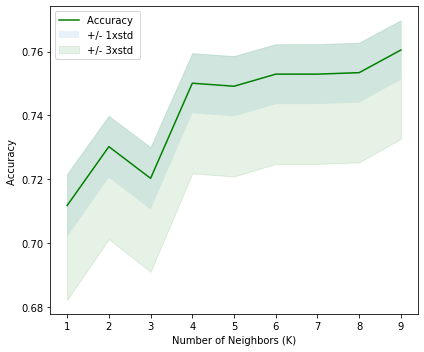

In [17]:
plt.figure(figsize=(6,5))
plt.plot(range(1,Ks), mean_acc, color='g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.1)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc +1 * std_acc, alpha = 0.1, color='g')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
highest_acc_score = mean_acc.max()
most_acc_k_value = mean_acc.argmax()+1
print('The highest accuracy score was {:.3f}' .format(highest_acc_score), 'with a k value of', most_acc_k_value)

The highest accuracy score was 0.761 with a k value of 9


### DECISION TREES

In [19]:
# Training the model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [20]:
# Making predictions
y_pred = dt.predict(X_test)

print(y_test[:5])
print(y_pred[:5])

[1 0 0 1 0]
[0 0 0 1 0]


In [21]:
# Evaluating
Decision_tree_accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy: {:.3f}' .format(Decision_tree_accuracy))

Decision Tree Accuracy: 0.752


In [24]:
# Plotting output
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [25]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_features
out=tree.export_graphviz(dt,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'my_features' is not defined

### LOGISTIC REGRESSION

In [26]:
#Training
lgr = LogisticRegression(C=0.1, solver='liblinear')
lgr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [27]:
#Prediction
y_pred = lgr.predict(X_test)
print(y_test[:5])
print(y_pred[:5])

[1 0 0 1 0]
[1 0 0 1 0]


In [28]:
#Finding The Probability of our prediction
ypred_prob = lgr.predict_proba(X_test)
ypred_prob

array([[0.46642842, 0.53357158],
       [0.82743264, 0.17256736],
       [0.98375814, 0.01624186],
       ...,
       [0.98830279, 0.01169721],
       [0.47617819, 0.52382181],
       [0.58144401, 0.41855599]])

In [29]:
# Evaluating
Logistic_regr_accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy: {:.3f}' .format(Logistic_regr_accuracy))

Decision Tree Accuracy: 0.787


### SUPPORT VECTOR MACHINES

In [30]:
# Training the model
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [31]:
y_pred = svm.predict(X_test)
y_pred[0:5]

print(y_test[:5])
print(y_pred[:5])

[1 0 0 1 0]
[1 0 0 1 0]


In [32]:
# Evaluating
svm_accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy: {:.3f}' .format(svm_accuracy))

Decision Tree Accuracy: 0.777


### Conclusion

From the above, we can see that the model that has the best performance is the Logistic Regression.
Using this model, we can now make predictions on whether the bank's customers will predict to our credict card services or they will churn them.

The following are the accuracy scores for all the models performances

In [33]:
print('The highest accuracy score was {:.3f}' .format(highest_acc_score), 'with a k value of', most_acc_k_value)
print('Decision Tree Accuracy: {:.3f}' .format(Decision_tree_accuracy))
print('Decision Tree Accuracy: {:.3f}' .format(Logistic_regr_accuracy))
print('Decision Tree Accuracy: {:.3f}' .format(svm_accuracy))

The highest accuracy score was 0.761 with a k value of 9
Decision Tree Accuracy: 0.752
Decision Tree Accuracy: 0.787
Decision Tree Accuracy: 0.777
